Data Used:
    lakes:
        https://nsidc.org/data/nsidc-0523/versions/1 (this is massive)

        https://www.npolar.no/quantarctica/#toggle-id-15 
        wright & siegert
        blankenship
        smith
        bell (recovery)
        studinger (vostok)
        optional: flux Le Brocq

    slopes:
        https://www.bas.ac.uk/project/bedmap-2/#data
        https://www.pgc.umn.edu/data/rema/
    
    support:
        https://usicecenter.gov/Products/AntarcData "Weekly Antartic Shapefile"
        https://www.npolar.no/quantarctica/ (this has mostly everything)
        https://www.bas.ac.uk/data/our-data/data-systems/

<Axes: >

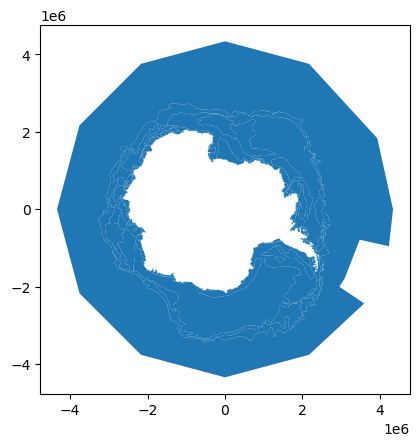

In [1]:
import geopandas as gpd
import rioxarray as xrio

shapefile_path = 'data\support\ANTARC241115.shp'
gdf = gpd.read_file(shapefile_path)
gdf.plot()

In [2]:
print(type(gdf))
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


,CT,CA,CB,CC,SO,SA,SB,SC,SD,FA,FB,FC,FS,FP,ICECODE,POLY_TYPE,Shape_Leng,Shape_Area,geometry
0,00,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,CT00CA-9-9-9CB-9-9-9CC-9-9-9CF-9-9CN-9CD-9,W,5.520622e+07,2.771760e+13,"POLYGON ((2169942.781 3758451.156, 3933272.094..."
1,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,1.021520e+06,1.638804e+10,"POLYGON ((-563727.446 -3332354.893, -572121.63..."
2,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,5.263802e+05,3.644714e+09,"POLYGON ((2220492.5 -840149.668, 2220944.923 -..."
3,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,6.635708e+06,1.216410e+11,"POLYGON ((2568905.293 -685088.448, 2571124.879..."
4,13,-9,-9,-9,98,86,-9,-9,-9,-9,-9,-9,-9,-9,CT13CA-986-9CB-9-9-9CC-9-9-9CF-9-9CN98CD-9,I,4.403055e+05,4.590068e+09,"POLYGON ((2127519.556 -742200.07, 2118697.306 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.300501e+06,1.292010e+10,"POLYGON ((-1900875.743 1502126.812, -1902653.7..."
166,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,3.173670e+05,1.712026e+09,"POLYGON ((-358272.532 1693799.95, -357280.343 ..."
167,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,5.939246e+05,1.063043e+10,"POLYGON ((-1744303.065 1864124.491, -1725569.9..."
168,92,10,90,-9,-9,98,95,-9,-9,-9,-9,-9,-9,08,CT92CA1098-9CB9095-9CC-9-9-9CF08-9CN-9CD-9,I,1.450039e+06,1.791794e+10,"POLYGON ((-752589.019 2061331.717, -748499.198..."


In [3]:
gdf.crs

<Projected CRS: PROJCS["WGS_1984_Stereographic_South_Pole",GEOGCS[ ...>
Name: WGS_1984_Stereographic_South_Pole
Axis Info [cartesian]:
- [north]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
lake_path = 'data\\lakes\\add_lakes_high_res_polygon_v7.3.shp'

lake_gdf = gpd.read_file(lake_path)

In [5]:
lake_gdf

,gid,source,updater,revdate,sourcedate,geometry
0,1,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2446641.048 1526216.871, -2446630.2..."
1,2,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2439133.441 1525700.439, -2439125.3..."
2,3,BAS SCISTAMAP 4: Signy Island. South Orkney Is...,APRC,NaT,2005-01-01,"POLYGON ((-2324666 2275861, -2324662.75 227586..."
3,4,BAS SCISTAMAP 4: Signy Island. South Orkney Is...,APRC,NaT,2005-01-01,"POLYGON ((-2325047.75 2275859, -2325044.5 2275..."
4,5,BAS SCISTAMAP 4: Signy Island. South Orkney Is...,APRC,NaT,2005-01-01,"POLYGON ((-2324178 2275012, -2324182.75 227501..."
...,...,...,...,...,...,...
1588,1589,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2436856.712 1528263.334, -2436856.8..."
1589,1590,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2446736.724 1528171.994, -2446743.5..."
1590,1591,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2446949.629 1528120.771, -2446940.4..."
1591,1592,Czech Geological Survey (2009): James Ross Isl...,APRC,2011-10-21,2009-01-01,"POLYGON ((-2441509.26 1526764.367, -2441503.48..."


<Axes: >

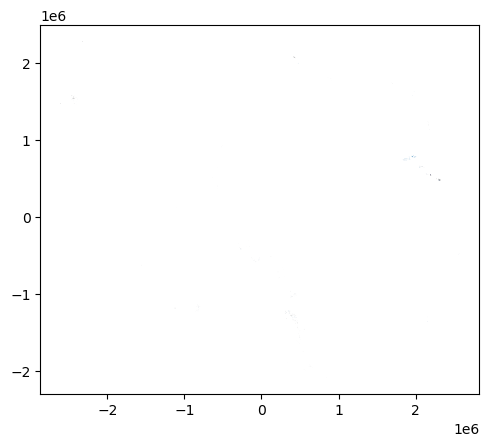

In [6]:
lake_gdf.plot()